## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, ensemble, tree, neighbors, svm
from sklearn.calibration import CalibratedClassifierCV

## Data collection

In [3]:
train = pd.read_csv(r'train.csv')
train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [4]:
test = pd.read_csv(r'test.csv')
test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


## Data understanding

### Train dataset

In [ ]:
train.columns

Index(['profile pic', 'nums/length username', 'fullname words',
       'nums/length fullname', 'name==username', 'description length',
       'external URL', 'private', '#posts', '#followers', '#follows', 'fake'],
      dtype='object')

In [ ]:
train.dtypes

profile pic               int64
nums/length username    float64
fullname words            int64
nums/length fullname    float64
name==username            int64
description length        int64
external URL              int64
private                   int64
#posts                    int64
#followers                int64
#follows                  int64
fake                      int64
dtype: object

In [ ]:
train.value_counts().sum()

576

In [ ]:
tr_smp = train.sample(10)
tr_smp

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
202,1,0.00,1,0.00,0,67,0,0,301,3896490,351,0
180,1,0.00,2,0.00,0,11,0,1,32,3800,278,0
143,1,0.00,2,0.00,0,5,0,1,60,2598,802,0
456,1,0.07,1,0.00,0,0,0,1,0,47,98,1
368,1,0.58,1,0.36,0,6,0,1,1,34,44,1
518,0,0.44,2,0.00,0,0,0,0,0,46,4,1
246,1,0.19,0,0.00,0,0,0,0,1,104,15,0
268,1,0.00,2,0.00,0,18,0,1,65,1746,1631,0
438,1,0.00,1,0.00,0,0,0,0,2,35,136,1
378,0,0.36,1,0.00,0,0,0,1,0,0,29,1


In [ ]:
tr_smp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 202 to 378
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           10 non-null     int64  
 1   nums/length username  10 non-null     float64
 2   fullname words        10 non-null     int64  
 3   nums/length fullname  10 non-null     float64
 4   name==username        10 non-null     int64  
 5   description length    10 non-null     int64  
 6   external URL          10 non-null     int64  
 7   private               10 non-null     int64  
 8   #posts                10 non-null     int64  
 9   #followers            10 non-null     int64  
 10  #follows              10 non-null     int64  
 11  fake                  10 non-null     int64  
dtypes: float64(2), int64(10)
memory usage: 1.0 KB


In [ ]:
tr_smp.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.0,10.000000,10.000000,1.000000e+01,10.000000,10.000000
mean,0.800000,0.164000,1.300000,0.036000,0.0,10.700000,0.0,0.600000,46.200000,3.904900e+05,338.800000,0.500000
std,0.421637,0.218998,0.674949,0.113842,0.0,20.683058,0.0,0.516398,93.161509,1.231884e+06,515.009558,0.527046
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,4.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.250000,3.775000e+01,32.750000,0.000000
50%,1.000000,0.035000,1.000000,0.000000,0.0,2.500000,0.0,1.000000,1.500000,7.550000e+01,117.000000,0.500000
75%,1.000000,0.317500,2.000000,0.000000,0.0,9.750000,0.0,1.000000,53.000000,2.385000e+03,332.750000,1.000000
max,1.000000,0.580000,2.000000,0.360000,0.0,67.000000,0.0,1.000000,301.000000,3.896490e+06,1631.000000,1.000000


### Test Dataset

In [ ]:
test.columns

Index(['profile pic', 'nums/length username', 'fullname words',
       'nums/length fullname', 'name==username', 'description length',
       'external URL', 'private', '#posts', '#followers', '#follows', 'fake'],
      dtype='object')

In [ ]:
test.dtypes

profile pic               int64
nums/length username    float64
fullname words            int64
nums/length fullname    float64
name==username            int64
description length        int64
external URL              int64
private                   int64
#posts                    int64
#followers                int64
#follows                  int64
fake                      int64
dtype: object

In [ ]:
test.value_counts().sum()

120

In [ ]:
te_smp = test.sample(10)
te_smp

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
98,0,0.31,1,0.33,0,0,0,0,0,42,175,1
69,0,0.62,1,0.40,0,0,0,0,1,17,34,1
15,1,0.00,2,0.00,0,56,0,1,51,498,337,0
28,1,0.33,1,0.00,0,0,0,1,5,348,347,0
72,0,0.62,1,0.40,0,0,0,0,0,0,18,1
101,1,0.38,1,0.00,0,0,0,0,3,88,72,1
26,1,0.00,1,0.00,0,137,1,0,1065,155537,1395,0
7,1,0.00,2,0.00,0,0,0,1,19,552,521,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
6,1,0.00,1,0.00,0,132,0,1,9,213,254,0


In [ ]:
te_smp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 98 to 6
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           10 non-null     int64  
 1   nums/length username  10 non-null     float64
 2   fullname words        10 non-null     int64  
 3   nums/length fullname  10 non-null     float64
 4   name==username        10 non-null     int64  
 5   description length    10 non-null     int64  
 6   external URL          10 non-null     int64  
 7   private               10 non-null     int64  
 8   #posts                10 non-null     int64  
 9   #followers            10 non-null     int64  
 10  #follows              10 non-null     int64  
 11  fake                  10 non-null     int64  
dtypes: float64(2), int64(10)
memory usage: 1.0 KB


In [ ]:
te_smp.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.700000,0.276000,1.200000,0.113000,0.0,40.100000,0.100000,0.500000,115.900000,15752.000000,350.900000,0.400000
std,0.483046,0.259581,0.421637,0.182942,0.0,56.788986,0.316228,0.527046,333.834773,49115.830139,401.203315,0.516398
min,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,0.250000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.500000,53.500000,97.750000,0.000000
50%,1.000000,0.320000,1.000000,0.000000,0.0,0.000000,0.000000,0.500000,5.500000,219.000000,295.500000,0.000000
75%,1.000000,0.470000,1.000000,0.247500,0.0,71.000000,0.000000,1.000000,16.500000,460.500000,353.750000,1.000000
max,1.000000,0.620000,2.000000,0.400000,0.0,137.000000,1.000000,1.000000,1065.000000,155537.000000,1395.000000,1.000000


## Data preparation

In [ ]:
# Checking for null values
train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [ ]:
test.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [ ]:
# checkng and removing duplicate records in train dataset
train=train.drop_duplicates()

In [ ]:
train.duplicated().sum()

0

In [ ]:
# checkng and removing duplicate records in test dataset
test=test.drop_duplicates()

In [ ]:
test.duplicated().sum()

0

In [ ]:
# correlation between target variable,
#i.e, "fake" and other variables for train dataset
print("For train dataset\n")
train.corr()[["fake"]]

For train dataset



,fake
profile pic,-0.638899
nums/length username,0.587863
fullname words,-0.297777
nums/length fullname,0.247248
name==username,0.171003
description length,-0.459736
external URL,-0.363524
private,-0.028667
#posts,-0.244854
#followers,-0.093843


In [ ]:
# correlation between target variable,
#i.e, "fake" and other variables for test dataset
print("\n\nFor test dataset\n")
test.corr()[["fake"]]



For test dataset



,fake
profile pic,-0.567309
nums/length username,0.509709
fullname words,-0.305437
nums/length fullname,0.300339
name==username,0.096847
description length,-0.556976
external URL,-0.330808
private,-0.664503
#posts,-0.328399
#followers,-0.128630


In [7]:
#Extracting independent & dependent variable from train.csv
feature_tr=train.drop(["fake"] , axis=1)
target_tr=train["fake"]

In [ ]:
print("Target variable:\n",target_tr)

Target variable:
 0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 574, dtype: int64


In [8]:
print("\nFeature variables:\n",feature_tr)


Feature variables:
      profile pic  nums/length username  fullname words  nums/length fullname  \
0              1                  0.27               0                  0.00   
1              1                  0.00               2                  0.00   
2              1                  0.10               2                  0.00   
3              1                  0.00               1                  0.00   
4              1                  0.00               2                  0.00   
..           ...                   ...             ...                   ...   
571            1                  0.55               1                  0.44   
572            1                  0.38               1                  0.33   
573            1                  0.57               2                  0.00   
574            1                  0.57               1                  0.00   
575            1                  0.27               1                  0.00   

     name==usernam

In [5]:
#Extracting independent & dependent variable from test.csv
feature_te=train.drop(["fake"] , axis=1)
target_te=train["fake"]

In [12]:
print("Target variable:\n",target_te)

Target variable:
 0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64


In [10]:
print("\nFeature variables:\n",feature_te)


Feature variables:
      profile pic  nums/length username  fullname words  nums/length fullname  \
0              1                  0.27               0                  0.00   
1              1                  0.00               2                  0.00   
2              1                  0.10               2                  0.00   
3              1                  0.00               1                  0.00   
4              1                  0.00               2                  0.00   
..           ...                   ...             ...                   ...   
571            1                  0.55               1                  0.44   
572            1                  0.38               1                  0.33   
573            1                  0.57               2                  0.00   
574            1                  0.57               1                  0.00   
575            1                  0.27               1                  0.00   

     name==usernam

In [ ]:
# Scaling the datasets
tr=StandardScaler().fit_transform(train)
print(tr)

[[ 0.65411061  0.50580845 -1.38631564 ... -0.09286701  0.48558343
  -1.        ]
 [ 0.65411061 -0.76841447  0.51283753 ... -0.09095687  0.02615876
  -1.        ]
 [ 0.65411061 -0.29648005  0.51283753 ... -0.09379024 -0.4474188
  -1.        ]
 ...
 [ 0.65411061  1.9216117   0.51283753 ... -0.0938594  -0.18504594
   1.        ]
 [ 0.65411061  1.9216117  -0.43673906 ... -0.09390222 -0.4746359
   1.        ]
 [ 0.65411061  0.50580845 -0.43673906 ... -0.09380012 -0.0239207
   1.        ]]


In [ ]:
te=StandardScaler().fit_transform(test)
print(te)

[[ 0.55777335  0.6175341  -0.47003969 ... -0.13035    -0.12876956
  -0.98319208]
 [ 0.55777335 -0.74720925  2.89145627 ... -0.13153224 -0.55175138
  -0.98319208]
 [ 0.55777335 -0.74720925  0.3703343  ... -0.13076757 -0.0835006
  -0.98319208]
 ...
 [ 0.55777335 -0.74720925  0.3703343  ... -0.12944962  1.97057831
   1.01709526]
 [-1.79284291 -0.04415965 -0.47003969 ... -0.13105204  0.64292468
   1.01709526]
 [ 0.55777335  1.07244855 -0.47003969 ... -0.1315218  -0.50789707
   1.01709526]]


## Exploratory data analysis

### Univariate analysis

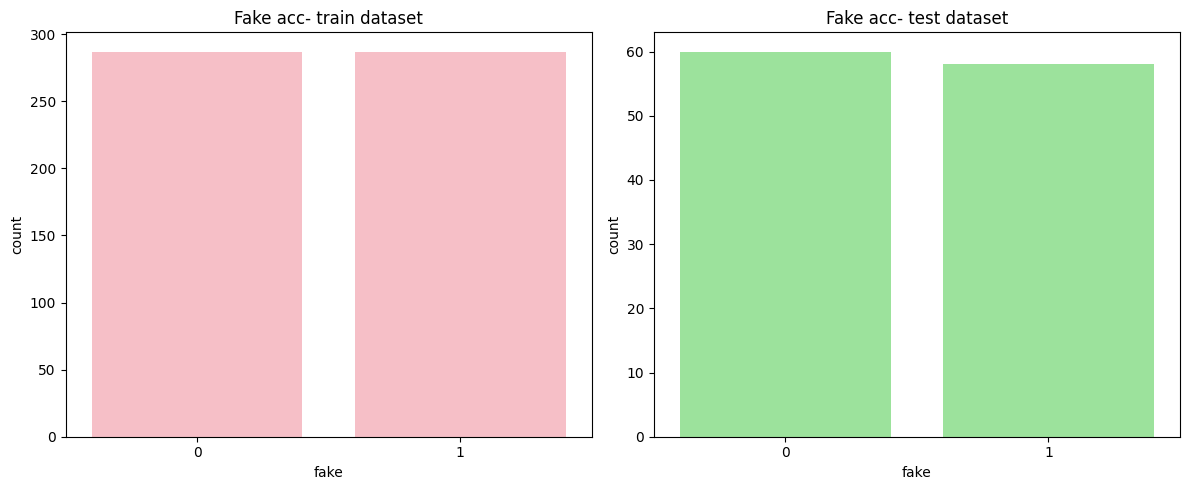

In [ ]:
#shows the count of fake accounts in train & test dataset
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(train,x='fake',color='lightpink')
plt.title('Fake acc- train dataset')

plt.subplot(1,2,2)
sns.countplot(test,x='fake',color='lightgreen')
plt.title('Fake acc- test dataset')

plt.tight_layout()
plt.show()

The above two graph represents the count of fake accounts,left side(light pink)graph indicates fake account count for train dataset the range is greater than 250 and spam users are constantly increasing.On the right side(light green)graph shows,fake account count for test dataset the number is more than 50.

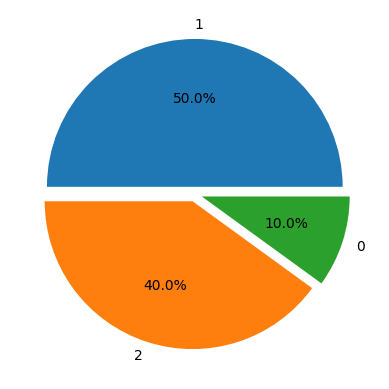

In [ ]:
x = tr_smp['fullname words'].value_counts()
explode = (0.05,) * len(x)
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%',
        explode=explode)
plt.show()

Fake account have username length long as we see in above pie graph it is 49.1% fake user have long and weird username.As well as they don't write full name in bio.While on the other side genuine users have short username and contains full name in bio.

### Bivariate analysis

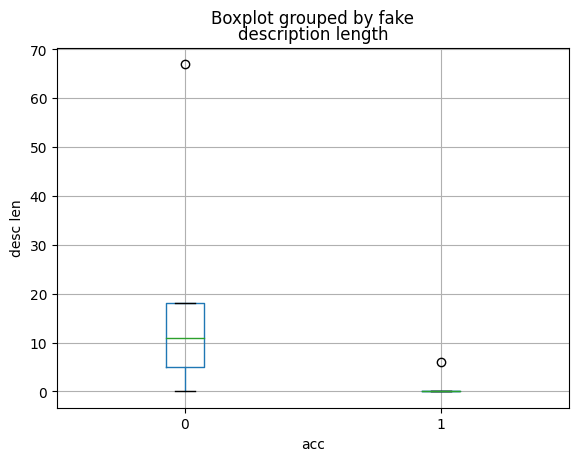

In [ ]:
tr_smp.boxplot(column="description length",by="fake")
plt.xlabel("acc")
plt.ylabel("desc len")
plt.show()

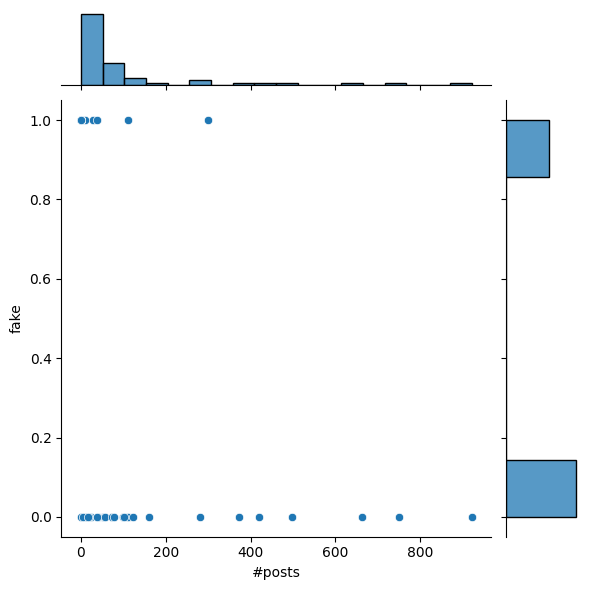

In [ ]:
tr_smp1=train.sample(50)
sns.jointplot(x="#posts",y="fake",kind="scatter",data=tr_smp1)

Fake accounts have less or no posts,they just have the fake profile pic posted.They don't post anything they track the information and posts from other users.Fake accounts post advertisement like lottery,money debited in your bank account,investment,etc.On the other side genuine accounts users dont'post related to such advertisement.

### Trivariate analysis

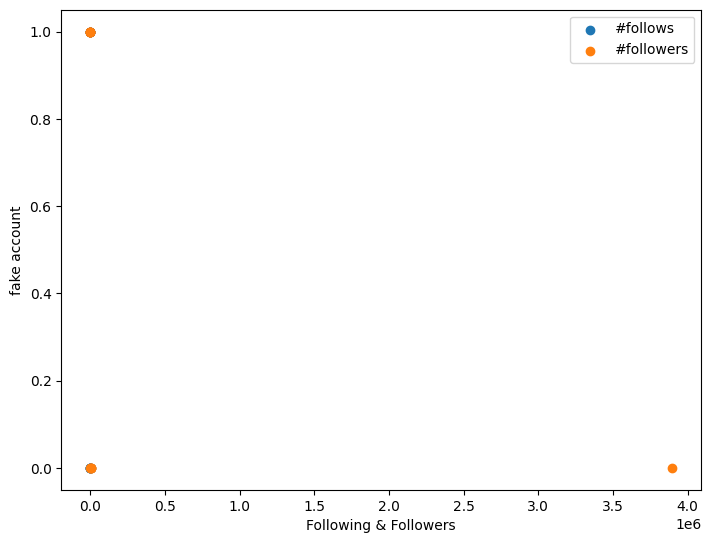

In [ ]:
#Axes object on train dataset
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
l1=ax.scatter(tr_smp['#follows'],tr_smp['fake'])
l2=ax.scatter(tr_smp['#followers'],tr_smp['fake'])
ax.legend(labels=('#follows','#followers'),loc='upper right')
ax.set_xlabel('Following & Followers')
ax.set_ylabel('fake account')
plt.show()

Fake accounts tend to have low number of followers and follow very few accounts. On the other hand, real accounts have a relatively larger amount of followers and follows. Fake accounts usually have less than 50 followers and approximately 200 follows. In contrast, genuine accounts' follows are scattered in the range of 100 and 1250 and the average number of followers is around 600.

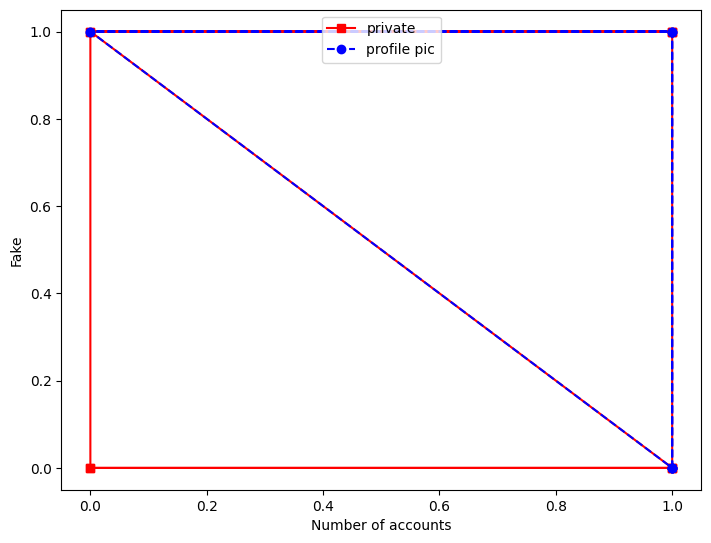

In [ ]:
#Axes object on test dataset
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
l1=ax.plot(tr_smp['private'],tr_smp['fake'],'rs-')
l2=ax.plot(tr_smp['profile pic'],tr_smp['fake'],'bo--')
ax.legend(labels=('private','profile pic'),loc='upper center')
ax.set_xlabel('Number of accounts')
ax.set_ylabel('Fake')
plt.show()

From the graph, it can be seen that the statistics of an account being private and having a profile picture is the same. Both the parameters appear more in real accounts instead of fake. This suggests that spam accounts are generally public, without a profile picture. Hence, the data hidden by the user plays a factor into determining whether the account is legitimate.


### Multivariate analysis

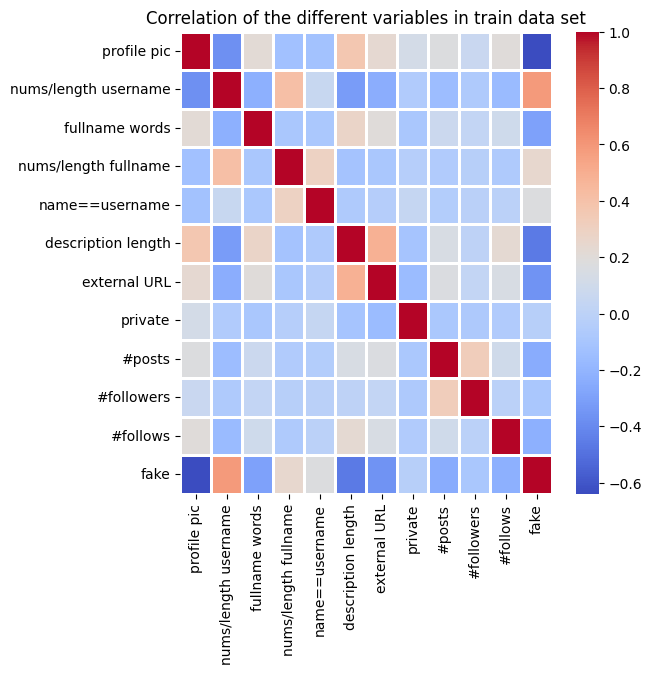

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(train.corr(), cmap='coolwarm', ax=ax , linewidths=.9)
ax.set_title("Correlation of the different variables in train data set")

plt.show()

This shows the correlation of different variable by various colors,how the no.of fake accounts are increasing on daily basis this shows complete information about their account activity(profile pic	nums/length username	fullname words	nums/length fullname	name==username	description length	external URL	private	#posts	#followers	#follows	fake),whereas light red color shows fake account starting from low till getting high in dark red and light blue color shows the genuine users activity from low till hight in dark blue color.

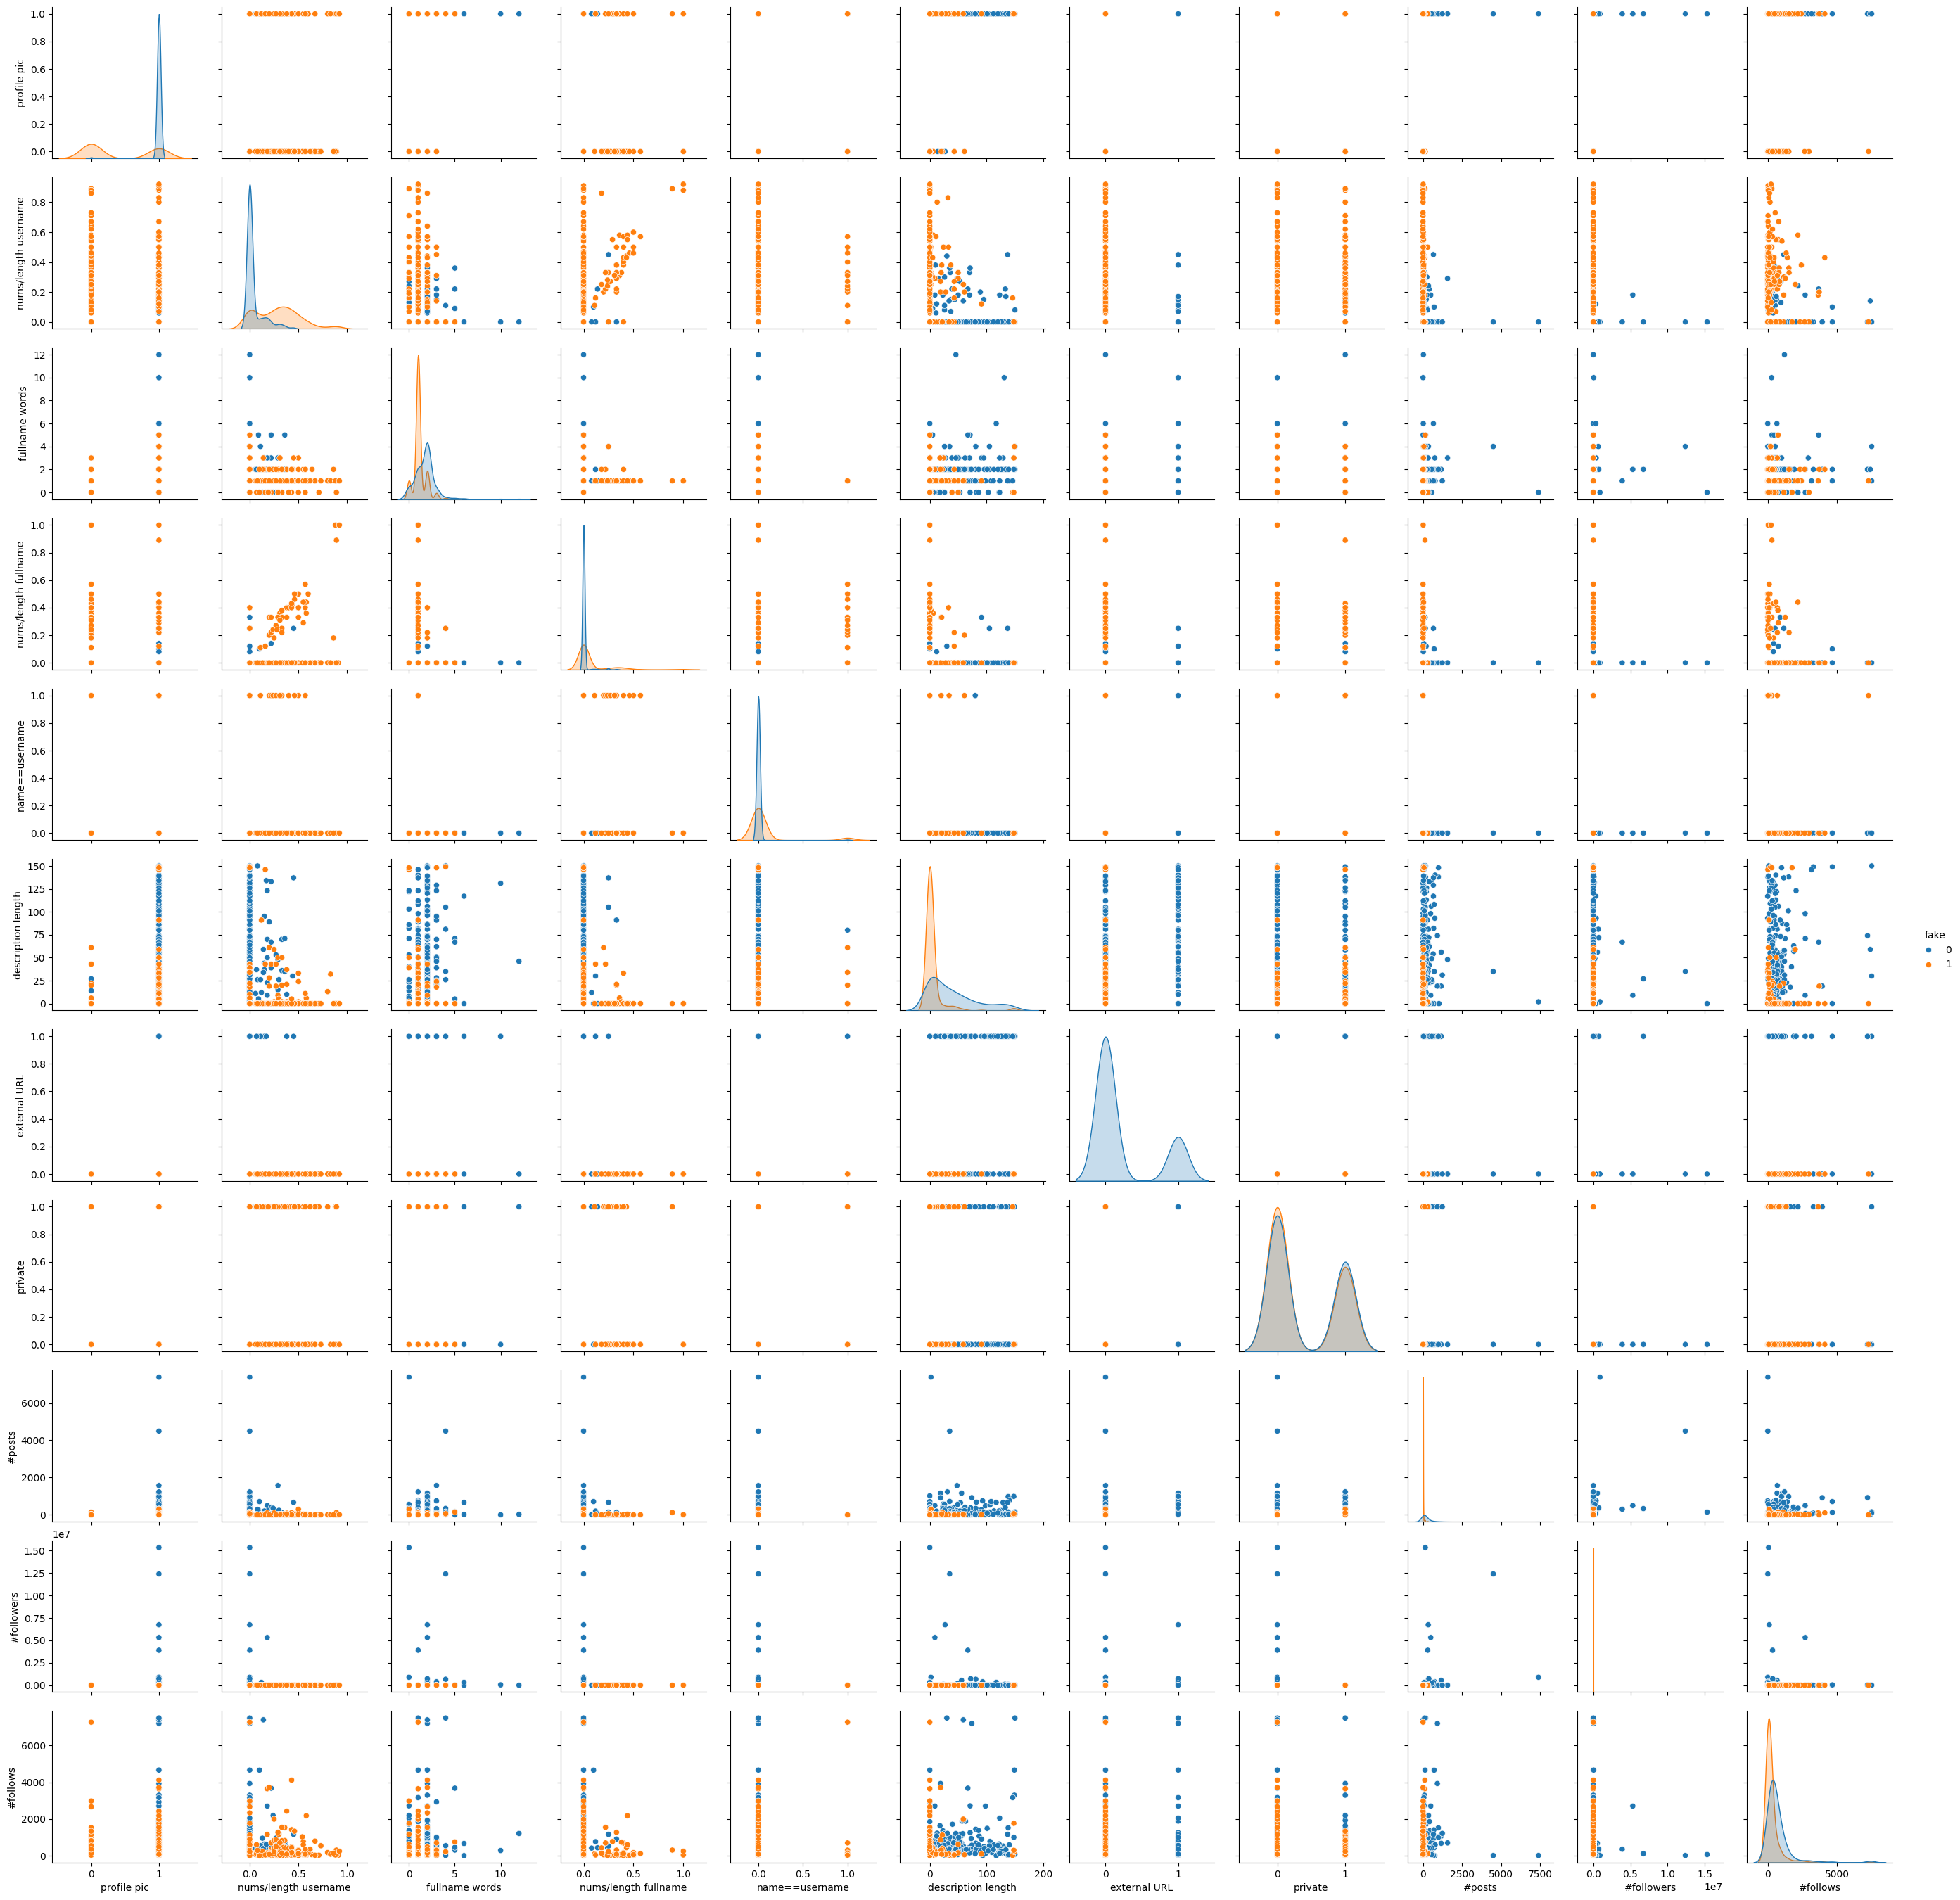

In [ ]:
sns.pairplot(train,hue="fake")


Above enumerous graph are dot graphs particular graph representing different activity based on data.

## Model creation

### Random Forest

In [ ]:
# Fitting the Random Forest algorithm to the training set
classifier1 = RandomForestClassifier(n_estimators=115 , random_state=28  , max_depth = 100 , max_samples = 350 )
classifier1.fit(feature_tr,target_tr)

RandomForestClassifier(max_depth=100, max_samples=350, n_estimators=115,
                       random_state=28)

In [ ]:
# Predicting the Test Set result
predict_target1 = classifier1.predict(feature_te)
predict_target1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#compute ROC and AUC curve
fpr, tpr, threshold = metrics.roc_curve(target_tr, predict_target1)
roc_auc = metrics.auc(fpr, tpr)


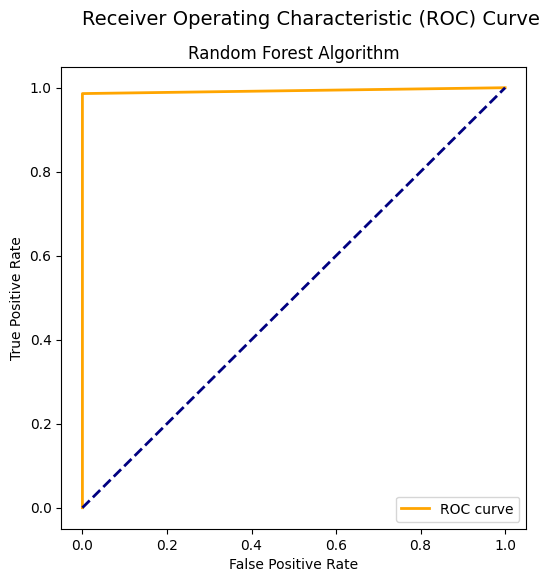

In [ ]:
#plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Algorithm',fontsize=12)
plt.text(0,1.15,'Receiver Operating Characteristic (ROC) Curve',fontsize=14)
plt.legend(loc='lower right')
plt.show()

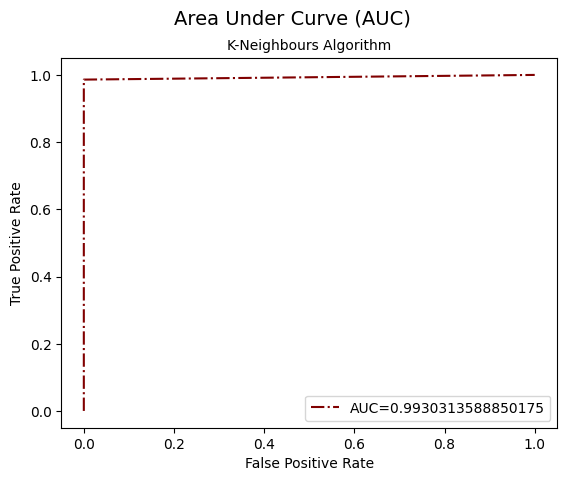

In [ ]:
# Plot AUC value separately
auc = metrics.roc_auc_score(target_tr, predict_target1)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc), color='maroon', linestyle='-.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('K-Neighbours Algorithm',fontsize=10)
plt.text(0.2,1.15,'Area Under Curve (AUC)',fontsize=14)
plt.legend(loc=4)
plt.show()

### Linear SVC

In [ ]:
# Fitting the Linear SVC algorithm to the training set
classifier2 = LinearSVC(random_state=28, max_iter=1000)
classifier2.fit(feature_tr,target_tr)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=28)

In [ ]:
# Predicting the Test Set result
predict_target2 = classifier2.predict(feature_te)
predict_target2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#compute ROC and AUC curve
fpr, tpr, threshold = metrics.roc_curve(target_tr, predict_target2)
roc_auc = metrics.auc(fpr, tpr)

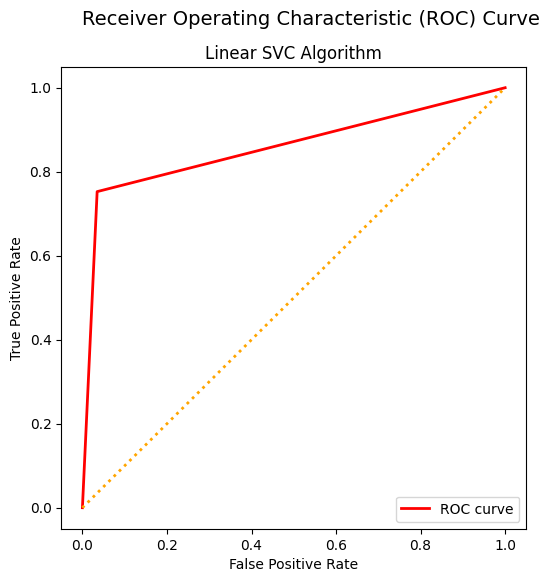

In [ ]:
#plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle=':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear SVC Algorithm',fontsize=12)
plt.text(0,1.15,'Receiver Operating Characteristic (ROC) Curve',fontsize=14)
plt.legend(loc='lower right')
plt.show()

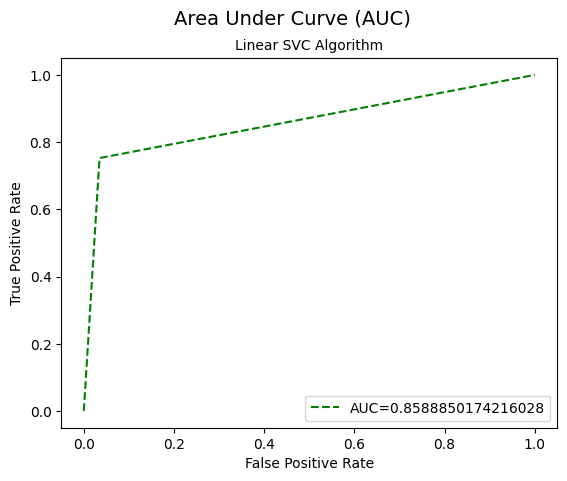

In [ ]:
# Plot AUC value separately
auc = metrics.roc_auc_score(target_tr, predict_target2)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc), color='green', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Linear SVC Algorithm',fontsize=10)
plt.text(0.2,1.15,'Area Under Curve (AUC)',fontsize=14)
plt.legend(loc=4)
plt.show()

### K-Neighbours

In [ ]:
# Fitting the K-Neighbours algorithm to the training set
classifier3 = KNeighborsClassifier(n_neighbors=10 , weights="distance")
classifier3.fit(feature_tr,target_tr)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [ ]:
# Predicting the Test Set result
predict_target3 = classifier3.predict(feature_te)
predict_target3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#compute ROC and AUC curve
fpr, tpr, threshold = metrics.roc_curve(target_tr, predict_target3)
roc_auc = metrics.auc(fpr, tpr)

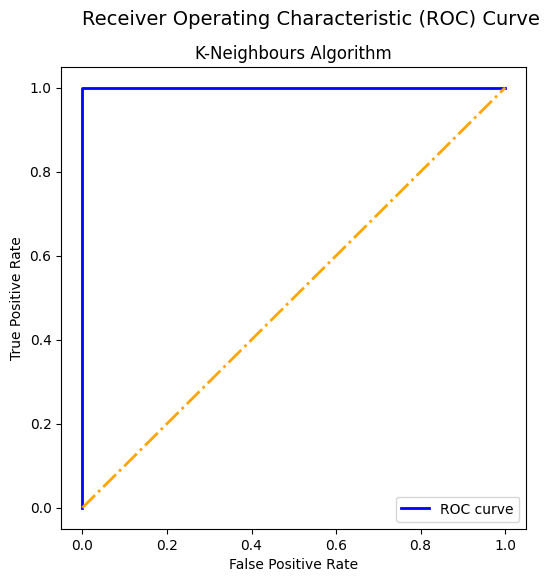

In [ ]:
#plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='-.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Neighbours Algorithm',fontsize=12)
plt.text(0,1.15,'Receiver Operating Characteristic (ROC) Curve',fontsize=14)
plt.legend(loc='lower right')
plt.show()

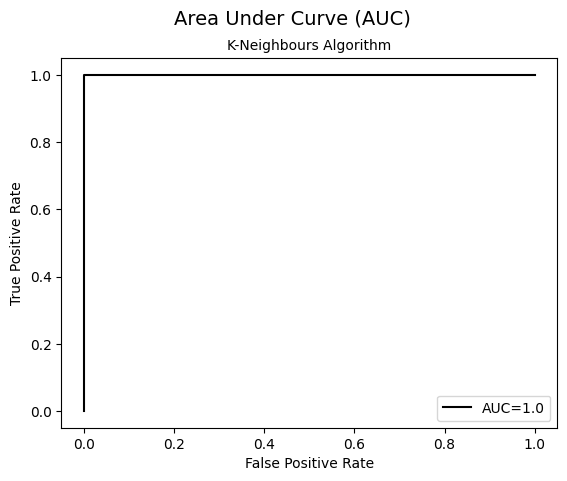

In [ ]:
# Plot AUC value separately
auc = metrics.roc_auc_score(target_tr, predict_target3)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc), color='black', linestyle='-')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('K-Neighbours Algorithm',fontsize=10)
plt.text(0.2,1.15,'Area Under Curve (AUC)',fontsize=14)
plt.legend(loc=4)
plt.show()

### Decision Tree

In [ ]:
# Fitting the Decision Tree algorithm to the training set
classifier4 = DecisionTreeClassifier(min_impurity_decrease=0.001)
classifier4.fit(feature_tr,target_tr)

DecisionTreeClassifier(min_impurity_decrease=0.001)

In [ ]:
# Predicting the Test Set result
predict_target4 = classifier4.predict(feature_te)
predict_target4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#compute ROC and AUC curve
fpr, tpr, threshold = metrics.roc_curve(target_tr, predict_target4)
roc_auc = metrics.auc(fpr, tpr)

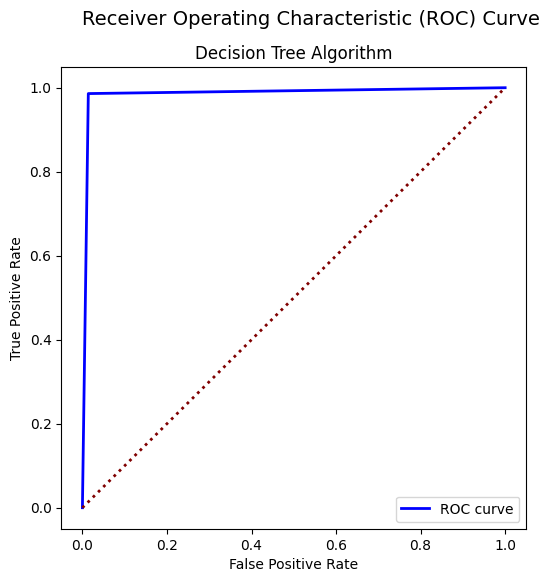

In [ ]:
#plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='maroon', lw=2, linestyle=':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Algorithm',fontsize=12)
plt.text(0,1.15,'Receiver Operating Characteristic (ROC) Curve',fontsize=14)
plt.legend(loc='lower right')
plt.show()

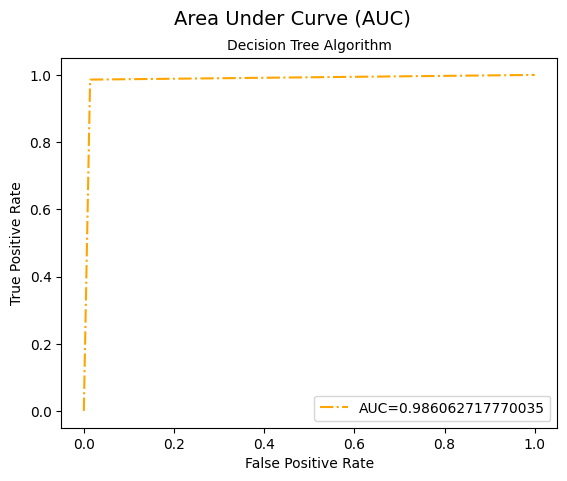

In [ ]:
# Plot AUC value separately
auc = metrics.roc_auc_score(target_tr, predict_target4)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc), color='orange', linestyle='-.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Decision Tree Algorithm',fontsize=10)
plt.text(0.2,1.15,'Area Under Curve (AUC)',fontsize=14)
plt.legend(loc=4)
plt.show()

### XGBoost

In [ ]:
# Fitting the Decision Tree algorithm to the training set
classifier5 = xgb.XGBClassifier()
classifier5.fit(feature_tr,target_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predicting the Test Set result
predict_target5 = classifier5.predict(feature_te)
predict_target5

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#compute ROC and AUC curve
fpr, tpr, threshold = metrics.roc_curve(target_tr, predict_target5)
roc_auc = metrics.auc(fpr, tpr)

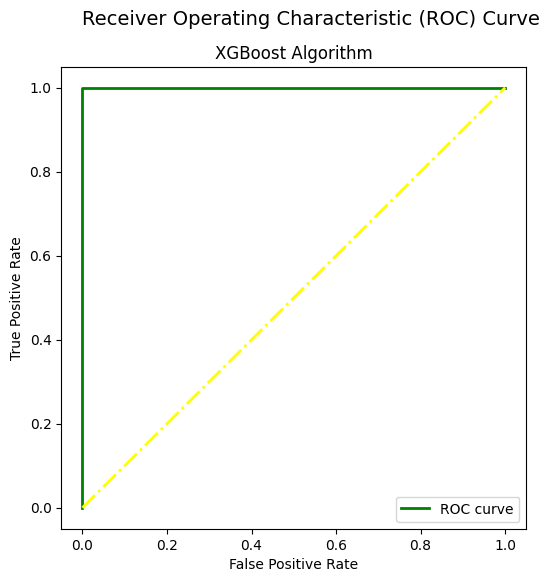

In [ ]:
#plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='yellow', lw=2, linestyle='-.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Algorithm',fontsize=12)
plt.text(0,1.15,'Receiver Operating Characteristic (ROC) Curve',fontsize=14)
plt.legend(loc='lower right')
plt.show()

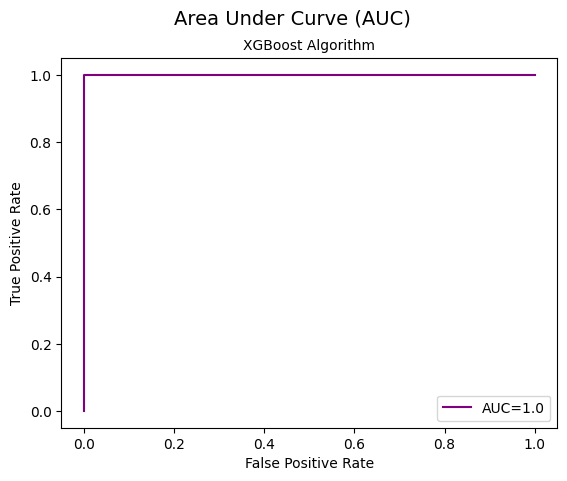

In [ ]:
# Plot AUC value separately
auc = metrics.roc_auc_score(target_tr, predict_target5)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc), color='purple', linestyle='-')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('XGBoost Algorithm',fontsize=10)
plt.text(0.2,1.15,'Area Under Curve (AUC)',fontsize=14)
plt.legend(loc=4)
plt.show()

## Model evaluation

### Random Forest

In [ ]:
print("\nClassification report:\n")
print(metrics.classification_report(target_te,predict_target1))


Classification report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       287
           1       1.00      0.99      0.99       287

    accuracy                           0.99       574
   macro avg       0.99      0.99      0.99       574
weighted avg       0.99      0.99      0.99       574



In [ ]:
print("\nConfusion matrix:\n\n")
print(metrics.confusion_matrix(target_te,predict_target1))


Confusion matrix:


[[287   0]
 [  4 283]]


From the above matrix, it can be seen that there are 4 + 0 = **4 incorrect** predictions and 287 + 283 = **570 correct predictions**

In [ ]:
#extracting TN, TP, FP, FN
tn, fp, fn, tp = metrics.confusion_matrix(target_te,predict_target1).ravel()
(tn, fp, fn, tp)

(287, 0, 4, 283)

In [ ]:
#plotting of confusion matrix
def plot_cm(cm,cmap=plt.cm.Blues):
  imp_words=['Fake','Genuine']
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title('Confusion Matrix')
  plt.colorbar()
  tick_marks=np.arange(len(imp_words))
  plt.xticks(tick_marks, imp_words, rotation=45)
  plt.yticks(tick_marks, imp_words)
  plt.tight_layout()
  plt.ylabel("True")
  plt.xlabel("Predicted")

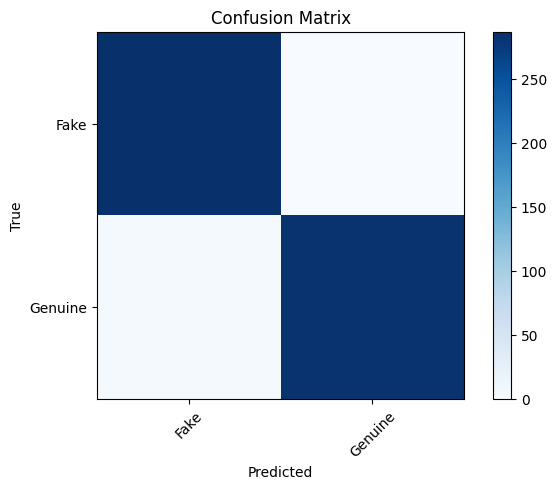

In [ ]:
plot_cm(metrics.confusion_matrix(target_te,predict_target1))

In [ ]:
print("\nAverage accuracy score of random forest model is:\n")
print(metrics.accuracy_score(target_te,predict_target1))


Average accuracy score of random forest model is:

0.9930313588850174


### Linear SVC

In [ ]:
print("\nClassification report:\n")
print(metrics.classification_report(target_te,predict_target2))


Classification report:

              precision    recall  f1-score   support

           0       0.80      0.97      0.87       287
           1       0.96      0.75      0.84       287

    accuracy                           0.86       574
   macro avg       0.88      0.86      0.86       574
weighted avg       0.88      0.86      0.86       574



In [ ]:
print("\nConfusion matrix:\n\n")
print(metrics.confusion_matrix(target_te,predict_target2))


Confusion matrix:


[[277  10]
 [ 71 216]]


From the above matrix, it can be seen that there are 36 + 14 = **50 incorrect** predictions and 251 + 273 = **524 correct predictions**

In [ ]:
#extracting TN, TP, FP, FN
tn, fp, fn, tp = metrics.confusion_matrix(target_te,predict_target2).ravel()
(tn, fp, fn, tp)

(277, 10, 71, 216)

In [ ]:
#plotting of confusion matrix
def plot_cm(cm,cmap=plt.cm.Greens):
  imp_words=['Fake','Genuine']
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title('Confusion Matrix')
  plt.colorbar()
  tick_marks=np.arange(len(imp_words))
  plt.xticks(tick_marks, imp_words, rotation=45)
  plt.yticks(tick_marks, imp_words)
  plt.tight_layout()
  plt.ylabel("True")
  plt.xlabel("Predicted")

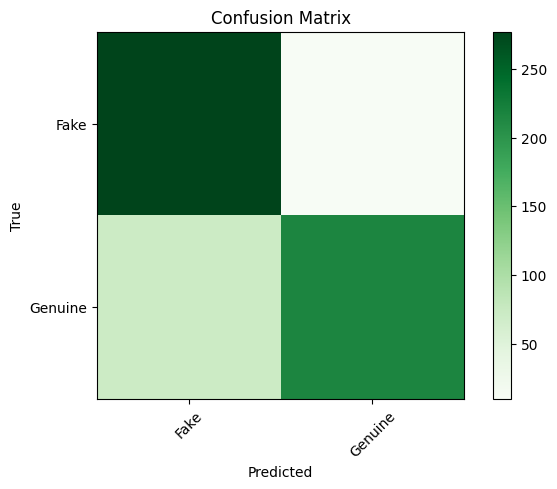

In [ ]:
plot_cm(metrics.confusion_matrix(target_te,predict_target2))

In [ ]:
print("\nAverage accuracy score of Linear SVC model is:\n")
print(metrics.accuracy_score(target_te,predict_target2))


Average accuracy score of Linear SVC model is:

0.8588850174216028


### K-Neighbours

In [ ]:
print("\nClassification report:\n")
print(metrics.classification_report(target_te,predict_target3))


Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       287

    accuracy                           1.00       574
   macro avg       1.00      1.00      1.00       574
weighted avg       1.00      1.00      1.00       574



In [ ]:
print("\nConfusion matrix:\n\n")
print(metrics.confusion_matrix(target_te,predict_target3))


Confusion matrix:


[[287   0]
 [  0 287]]


From the above matrix, it can be seen that there are 0 + 0 = **0 incorrect** predictions and 287 + 287 = **574 correct predictions**

In [ ]:
#extracting TN, TP, FP, FN
tn, fp, fn, tp = metrics.confusion_matrix(target_te,predict_target3).ravel()
(tn, fp, fn, tp)

(287, 0, 0, 287)

In [ ]:
#plotting of confusion matrix
def plot_cm(cm,cmap=plt.cm.Reds):
  imp_words=['Fake','Genuine']
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title('Confusion Matrix')
  plt.colorbar()
  tick_marks=np.arange(len(imp_words))
  plt.xticks(tick_marks, imp_words, rotation=45)
  plt.yticks(tick_marks, imp_words)
  plt.tight_layout()
  plt.ylabel("True")
  plt.xlabel("Predicted")

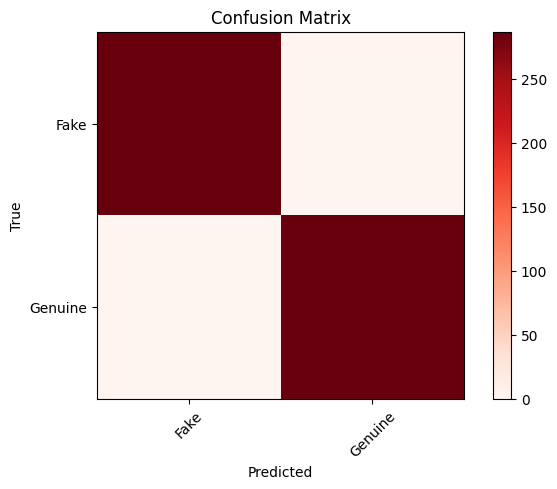

In [ ]:
plot_cm(metrics.confusion_matrix(target_te,predict_target3))

In [ ]:
print("\nAverage accuracy score of K-Neighbour model is:\n")
print(metrics.accuracy_score(target_te,predict_target3))


Average accuracy score of K-Neighbour model is:

1.0


### Decision Trees

In [ ]:
print("\nClassification report:\n")
print(metrics.classification_report(target_te,predict_target4))


Classification report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       287
           1       0.99      0.99      0.99       287

    accuracy                           0.99       574
   macro avg       0.99      0.99      0.99       574
weighted avg       0.99      0.99      0.99       574



In [ ]:
print("\nConfusion matrix:\n\n")
print(metrics.confusion_matrix(target_te,predict_target4))


Confusion matrix:


[[283   4]
 [  4 283]]


From the above matrix, it can be seen that there are 4 + 4 = **8 incorrect** predictions and 283 + 283 = **566 correct predictions**

In [ ]:
#extracting TN, TP, FP, FN
tn, fp, fn, tp = metrics.confusion_matrix(target_te,predict_target4).ravel()
(tn, fp, fn, tp)

(283, 4, 4, 283)

In [ ]:
#plotting of confusion matrix
def plot_cm(cm,cmap=plt.cm.Greys):
  imp_words=['Fake','Genuine']
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title('Confusion Matrix')
  plt.colorbar()
  tick_marks=np.arange(len(imp_words))
  plt.xticks(tick_marks, imp_words, rotation=45)
  plt.yticks(tick_marks, imp_words)
  plt.tight_layout()
  plt.ylabel("True")
  plt.xlabel("Predicted")

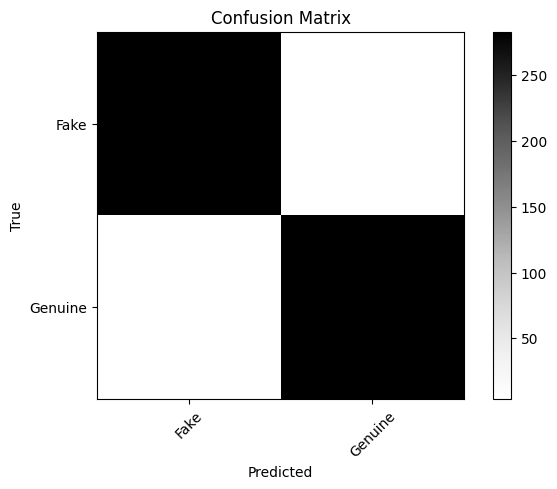

In [ ]:
plot_cm(metrics.confusion_matrix(target_te,predict_target4))

In [ ]:
print("\nAverage accuracy score of decision tree model is:\n")
print(metrics.accuracy_score(target_te,predict_target4))


Average accuracy score of decision tree model is:

0.9860627177700348


### XGBoost

In [ ]:
print("\nClassification report:\n")
print(metrics.classification_report(target_te,predict_target5))


Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       287

    accuracy                           1.00       574
   macro avg       1.00      1.00      1.00       574
weighted avg       1.00      1.00      1.00       574



In [ ]:
print("\nConfusion matrix:\n\n")
print(metrics.confusion_matrix(target_te,predict_target5))


Confusion matrix:


[[287   0]
 [  0 287]]


From the above matrix, it can be seen that there are 0 + 0 = **0 incorrect** predictions and 287 + 287 = **574 correct predictions**

In [ ]:
#extracting TN, TP, FP, FN
tn, fp, fn, tp = metrics.confusion_matrix(target_te,predict_target5).ravel()
(tn, fp, fn, tp)

(287, 0, 0, 287)

In [ ]:
#plotting of confusion matrix
def plot_cm(cm,cmap=plt.cm.BuPu):
  imp_words=['Fake','Genuine']
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title('Confusion Matrix')
  plt.colorbar()
  tick_marks=np.arange(len(imp_words))
  plt.xticks(tick_marks, imp_words, rotation=45)
  plt.yticks(tick_marks, imp_words)
  plt.tight_layout()
  plt.ylabel("True")
  plt.xlabel("Predicted")

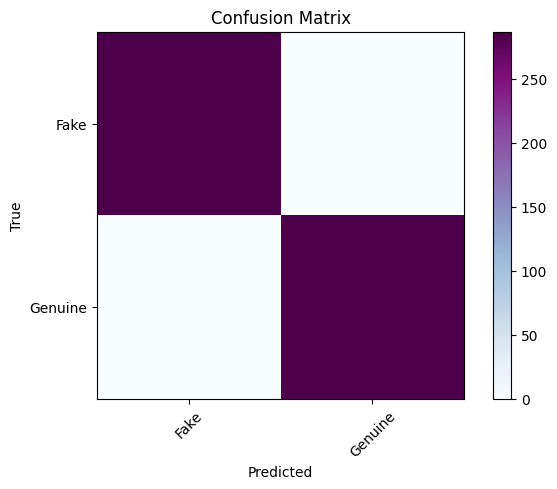

In [ ]:
plot_cm(metrics.confusion_matrix(target_te,predict_target5))

In [ ]:
print("\nAverage accuracy score of XGBoost model is:\n")
print(metrics.accuracy_score(target_te,predict_target5))


Average accuracy score of XGBoost model is:

1.0


## Model comparison

In [ ]:
MLA = [#random forest                    #Linear SVC      #K-Neighbours                     #Decision Tree                 #XGBoost
      ensemble.RandomForestClassifier(), svm.LinearSVC(), neighbors.KNeighborsClassifier(), tree.DecisionTreeClassifier(), xgb.XGBClassifier()]
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

In [ ]:
row_index = 0
for alg in MLA:
    predicted = alg.fit(feature_tr, target_tr).predict(feature_te)
    fp, tp, th = roc_curve(target_te, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'Algorithms'] = MLA_name
    MLA_compare.loc[row_index, 'Accuracy'] = metrics.accuracy_score(target_te, predicted)
    MLA_compare.loc[row_index, 'Precision'] = metrics.precision_score(target_te, predicted)
    MLA_compare.loc[row_index, 'Recall'] = metrics.recall_score(target_te, predicted)
    MLA_compare.loc[row_index, 'F1-score'] = metrics.f1_score(target_te, predicted)

    row_index += 1

MLA_compare.sort_values(by='Accuracy', ascending=False, inplace=True)
MLA_compare

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Algorithms,Accuracy,Precision,Recall,F1-score
0,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000
3,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000
4,XGBClassifier,1.000000,1.000000,1.000000,1.000000
2,KNeighborsClassifier,0.916376,0.910653,0.923345,0.916955
1,LinearSVC,0.879791,0.957983,0.794425,0.868571


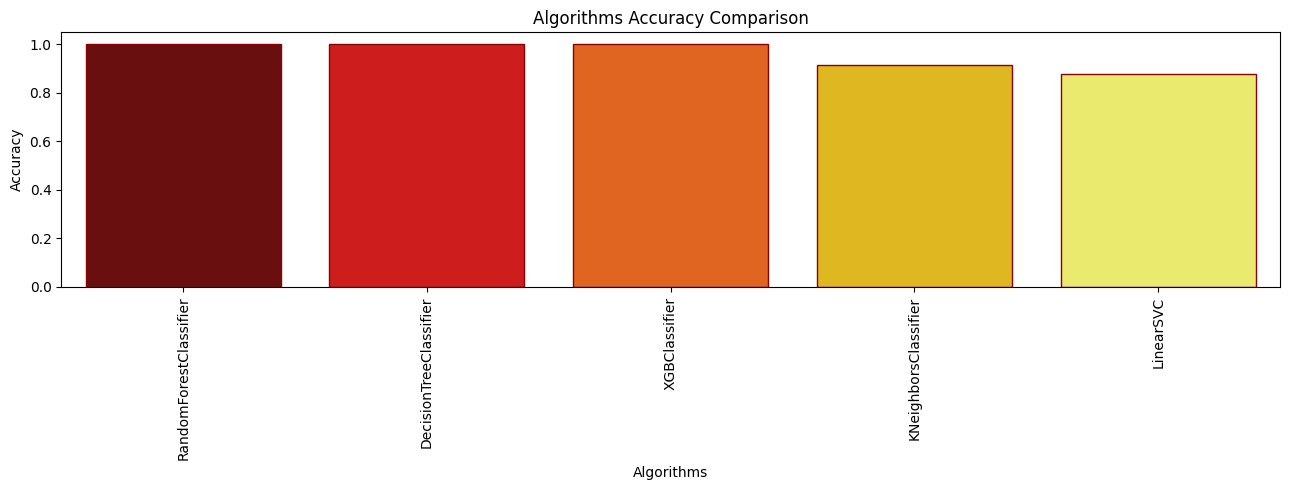

In [ ]:
#creating plot to show the accuracy
plt.figure(figsize=(13, 5))
sns.barplot(x="Algorithms", y="Accuracy", data=MLA_compare, palette='hot', hue="Algorithms", edgecolor='darkred',legend=False)
plt.xticks(rotation=90)
plt.title('Algorithms Accuracy Comparison')
plt.tight_layout()
plt.show()

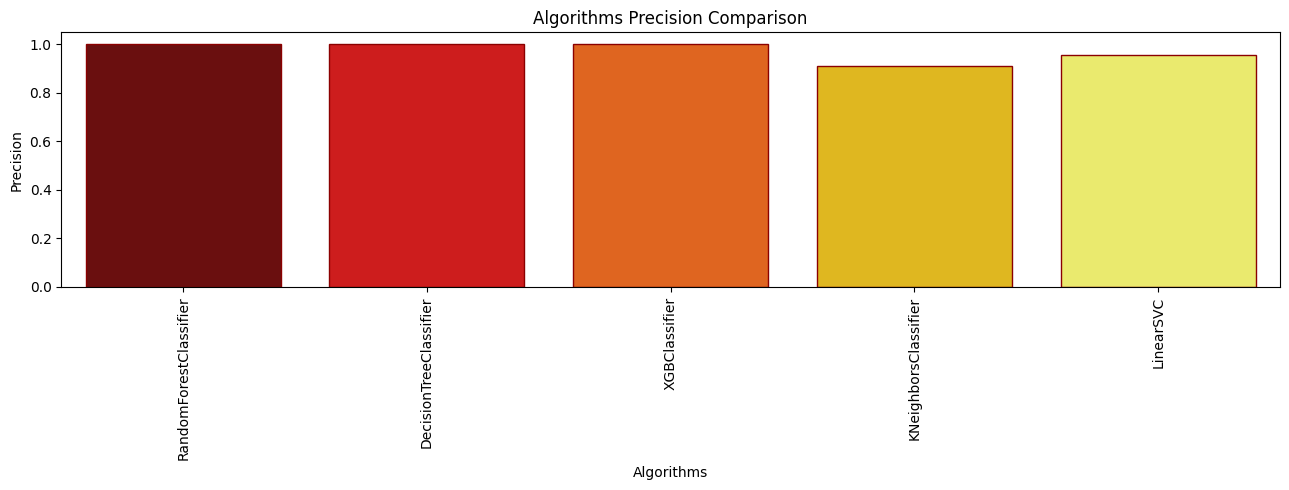

In [ ]:
#creating plot to show the precision
plt.figure(figsize=(13, 5))
sns.barplot(x="Algorithms", y="Precision", data=MLA_compare, palette='hot', hue="Algorithms", edgecolor='darkred',legend=False)
plt.xticks(rotation=90)
plt.title('Algorithms Precision Comparison')
plt.tight_layout()
plt.show()

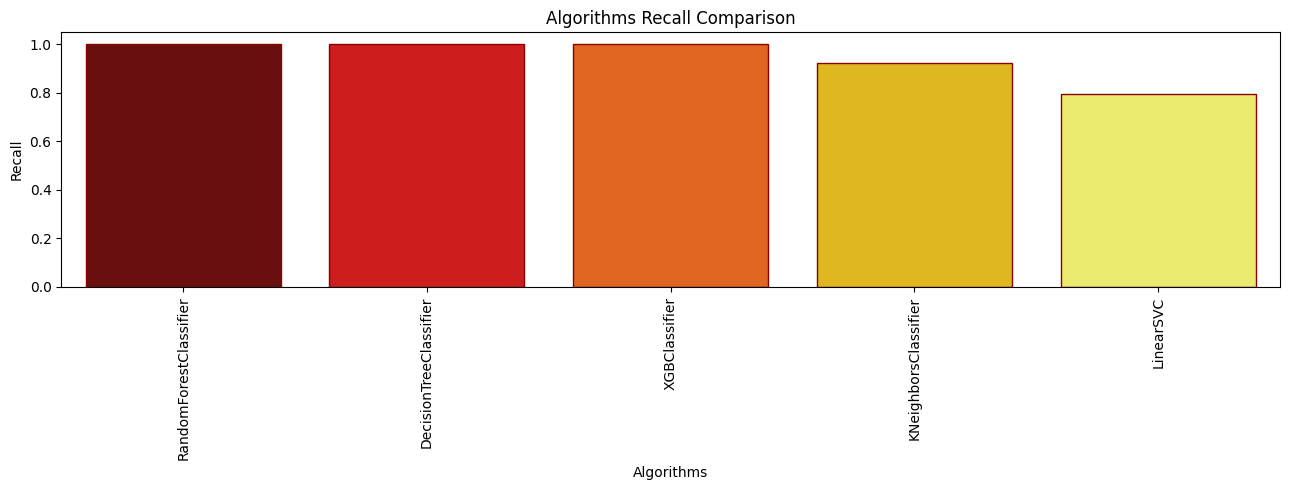

In [ ]:
#creating plot to show the recall
plt.figure(figsize=(13, 5))
sns.barplot(x="Algorithms", y="Recall", data=MLA_compare, palette='hot', hue="Algorithms", edgecolor='darkred',legend=False)
plt.xticks(rotation=90)
plt.title('Algorithms Recall Comparison')
plt.tight_layout()
plt.show()

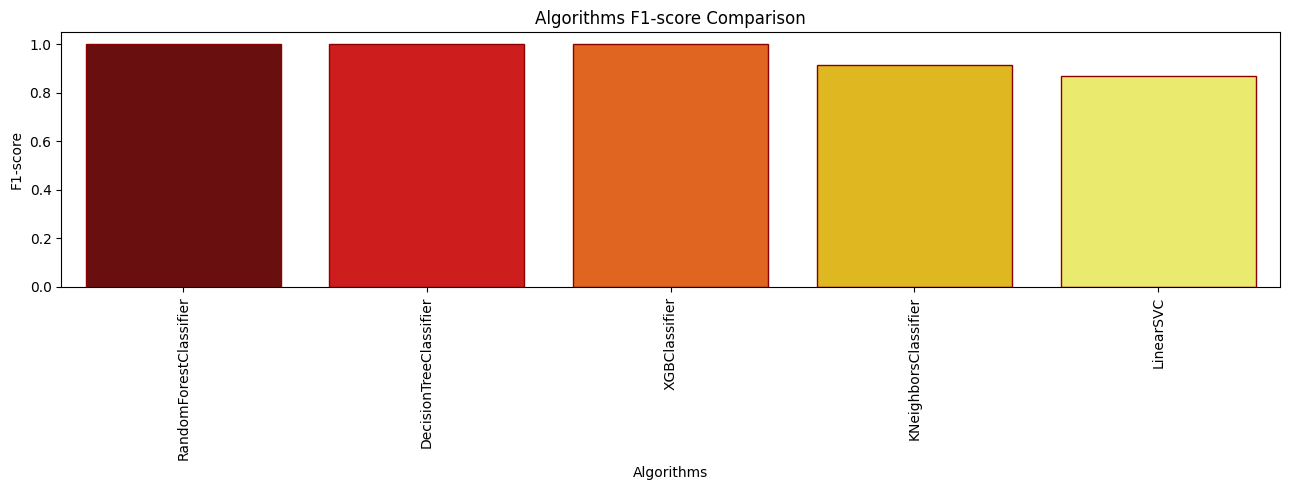

In [ ]:
#creating plot to show the f1-score
plt.figure(figsize=(13, 5))
sns.barplot(x="Algorithms", y="F1-score", data=MLA_compare, palette='hot', hue="Algorithms", edgecolor='darkred',legend=False)
plt.xticks(rotation=90)
plt.title('Algorithms F1-score Comparison')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


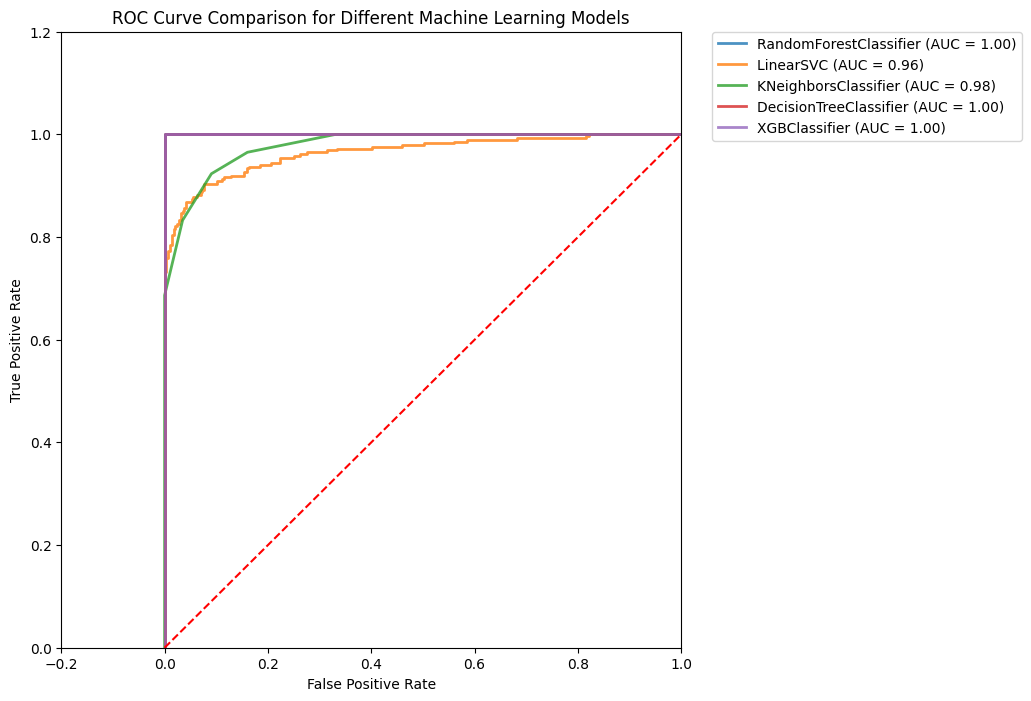

In [ ]:
#creating plot to show ROC for different Algorithm
plt.figure(figsize=(8, 8))
for alg in MLA:
    if hasattr(alg, "predict_proba"):  # Check if the algorithm supports probability estimates
        predicted = alg.fit(feature_tr, target_tr).predict_proba(feature_te)[:, 1]
    elif hasattr(alg, "decision_function"):  # For LinearSVC which doesn't have predict_proba
        calibrated_clf = CalibratedClassifierCV(alg)  # Calibrate probabilities using CalibratedClassifierCV
        calibrated_clf.fit(feature_tr, target_tr)
        predicted = calibrated_clf.predict_proba(feature_te)[:, 1]
    else:
        predicted = alg.fit(feature_tr, target_tr).decision_function(feature_te)  # For algorithms like SVM
    fp, tp, _ = roc_curve(target_te, predicted)
    roc_auc_mla = metrics.auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.8, label='%s (AUC = %0.2f)' % (MLA_name, roc_auc_mla))

plt.title('ROC Curve Comparison for Different Machine Learning Models')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.2, 1])
plt.ylim([0, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()